## SERIES DE TIEMPO PARA PRONÓSTICOS EN ECONOMÍA Y FINANZAS
### CLASE 8: Evaluación de prónostico punto

<div style="text-align: right"> Elaborado por Jorge Guerra </div>
<div style="text-align: right"> @jguerrae18 </div>
<div style="text-align: right"> ja.guerrae@uniandes.edu.co </div>

In [2]:
import warnings 
warnings.filterwarnings("ignore") #código para ignorar los anuncios de alertas

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

> **¿Qué haremos el día de hoy?**


El análisis se basará en una sola variable. La tasa de desempleo mensual en Colombia desde enero del año 2001 hasta el mes de noviembre del año 2019. La fuente de datos es el Departamento Administrativo Nacional de Estadística y la tasa de desempleo es la total Nacional. el código se dividirá en las siguientes secciones:

1. Estimación de mejores modelos autoregresivos.
2. Prónostico un Paso Adelante.
3. Comportamiento de errores.
4. Regresiones Mincer-Zarnowits.
5. Medidas de precisión de pronósticos.
6. Evaluación de prónostico.

---


In [3]:
#IMPORTANDO LOS PAQUETES MÁS IMPORTANTES. RECORDANDO

import pandas as pd #Pandas para el procesamiento de los datos
import matplotlib.pyplot as plt #Matplotlib para gráficar
import seaborn as sns #Seaborn para gráficar
import numpy as np #Numpy para el procesamiento númerico

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,  plot_pacf

In [5]:
df = pd.read_excel("desempleo.xlsx") #leer base de datos

In [6]:
df["FECHA"] = pd.to_datetime(df["FECHA"]) #convertir en formato fecha
df = df.set_index("FECHA") #fijar la fecha como un índice ( ya no como columna)
df.index.freq = "MS" #Fijar frecuencia mensual

In [7]:
df.describe() #descripción de la variable

,TD_SA
count,229.000000
mean,11.360661
std,2.001040
min,8.543028
25%,9.628216
50%,10.983525
75%,12.342780
max,16.552897


In [8]:
df["DTD"] = df.TD_SA.diff(1) #TRNSFORMEMOS LA SERIE PARA QUE SEA ESTACIONARIA

In [9]:
df

,TD_SA,DTD
FECHA,,
2001-01-01,15.361843,NaN
2001-02-01,15.661992,0.300149
2001-03-01,15.982787,0.320795
2001-04-01,13.883685,-2.099101
2001-05-01,15.055031,1.171346
...,...,...
2019-09-01,10.664752,-0.444984
2019-10-01,10.688947,0.024195
2019-11-01,10.590073,-0.098874


## 1. Estimación de mejores modelos autoregresivos

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
############ MEJOR MODELO

from itertools import product

p = [1,2,3,4,5]
q = [1,2,3,4,5]

scores = pd.DataFrame(product(*[p,q]), columns = ["p", "q"]) #DATAFRAME VACIO CON LAS DIFERENTES COMBINACIONES

In [12]:
scores.head(10)

,p,q
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,2,1
6,2,2
7,2,3
8,2,4
9,2,5


In [13]:
for p in range(1,6): #1 rango de orden p
    for q in range(1,6): # 2rango de orden q
        model = ARIMA(df["DTD"].dropna(), order=(p, 0, q)).fit() #modelo
        scores.loc[ (scores.p == p) & (scores.q == q), "AIC"] = round(model.aic, 2) #cuando la columna p y q sean p y q (del loop) rellenar el AIC con el del modelo
        scores.loc[ (scores.p == p) & (scores.q == q), "BIC"] = round(model.bic, 2)

¿Cómo se ve en la tabla?

In [14]:
scores.head(10)

,p,q,AIC,BIC
0,1,1,332.63,346.35
1,1,2,333.05,350.20
2,1,3,334.70,355.27
3,1,4,332.98,356.99
4,1,5,333.33,360.76
5,2,1,333.89,351.04
6,2,2,334.63,355.20
7,2,3,332.37,356.38
8,2,4,334.25,361.68
9,2,5,335.32,366.18


In [15]:
!pip install kaleido

Miremos como se ve gráficamente:

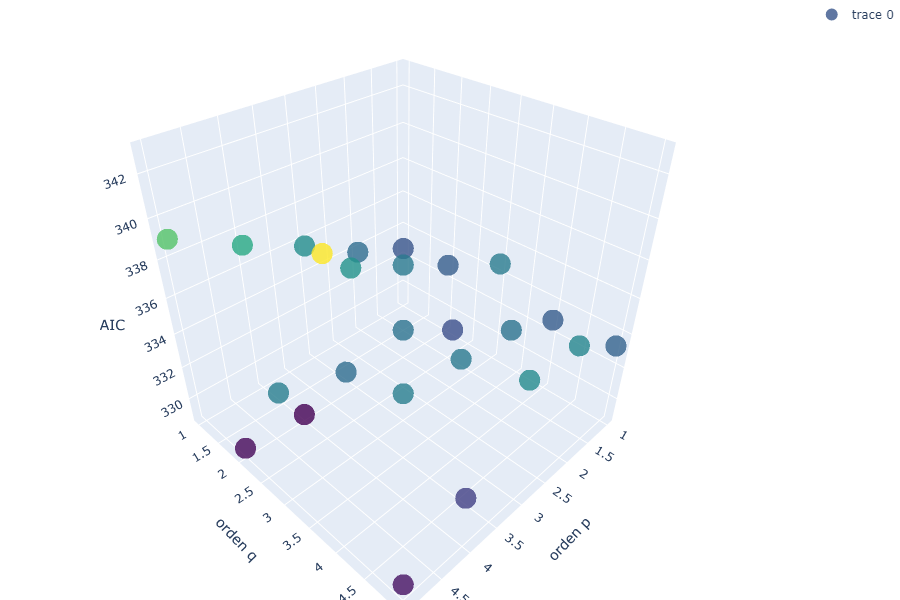

In [19]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(
    data=[go.Scatter3d(
        x=scores.p,
        y=scores.q,
        z=scores.AIC,
        mode='markers',
        marker=dict(
            size=12,
            color=scores.AIC,  
            colorscale='Viridis',   
            opacity=0.8))
            ]
            )

# tight layouti
fig.update_layout(margin=dict(l=10, r=0, b=0, t=0),  
                width=900, 
                height=600, 
                scene_aspectmode='cube', 
                showlegend=True, 
                scene = dict(
                    xaxis_title='orden p',
                    yaxis_title='orden q',
                    zaxis_title='AIC')
                )

fig.write_image("fig1.png")
fig.show("png")


In [20]:
scores.sort_values("AIC") #ORDENANDO DE MENOR A MAYOR VALOR


,p,q,AIC,BIC
16,4,2,328.95,356.38
21,5,2,329.17,360.04
24,5,5,329.58,370.73
19,4,5,331.60,369.33
7,2,3,332.37,356.38
0,1,1,332.63,346.35
3,1,4,332.98,356.99
1,1,2,333.05,350.20
4,1,5,333.33,360.76
17,4,3,333.87,364.73


Mejores modelos son ARIMA (4,1,2) y ARIMA (5,1,2).

## 2. Prónostico un Paso Adelante

In [21]:
f1 = []
f2 = []

df["F1"] = np.nan
df["F2"] = np.nan

In [22]:
df

,TD_SA,DTD,F1,F2
FECHA,,,,
2001-01-01,15.361843,NaN,NaN,NaN
2001-02-01,15.661992,0.300149,NaN,NaN
2001-03-01,15.982787,0.320795,NaN,NaN
2001-04-01,13.883685,-2.099101,NaN,NaN
2001-05-01,15.055031,1.171346,NaN,NaN
...,...,...,...,...
2019-09-01,10.664752,-0.444984,NaN,NaN
2019-10-01,10.688947,0.024195,NaN,NaN
2019-11-01,10.590073,-0.098874,NaN,NaN


In [23]:
for i in range(0,99):
    model1 = ARIMA(df["TD_SA"][i: 130+i], order=(4, 1, 2)).fit() #MODELOS CON ROLLING WINDOW
    model2 = ARIMA(df["TD_SA"][i: 130+i], order=(5, 1, 2)).fit()

    df.iloc[130+i, 2] = model1.forecast(1)[0] #FORECAST F1
    df.iloc[130+i, 3] = model2.forecast(1)[0] #FORECAST F2

df.iloc[137, 3] = df.iloc[137, 2]

¿Cómo se ven visualmente?

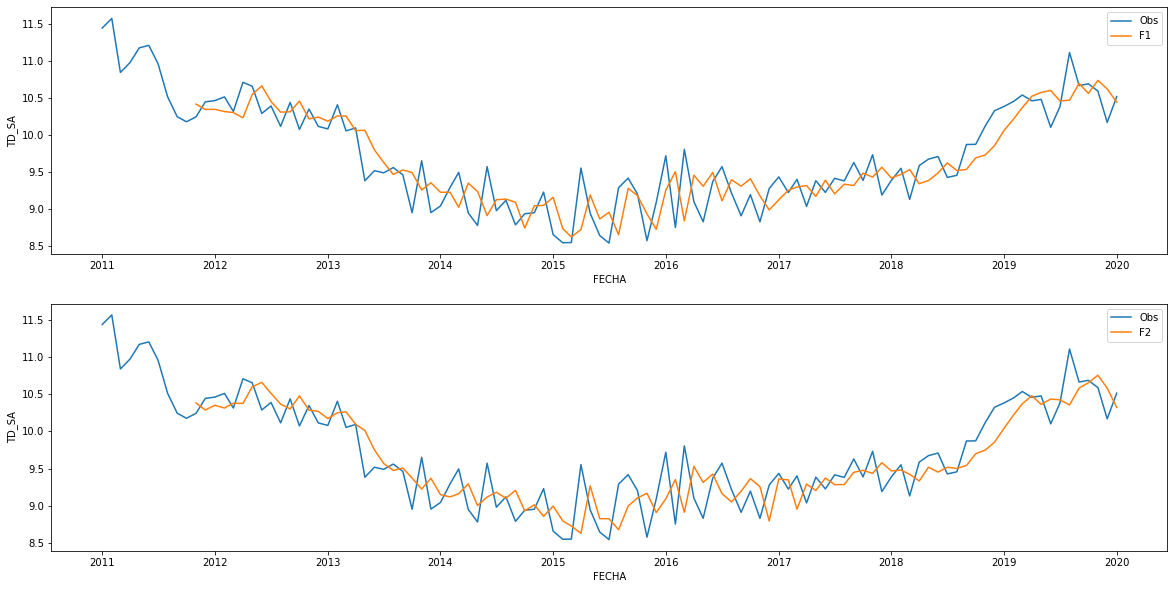

In [44]:
fig, ax =plt.subplots(2,1, figsize=(20, 10), sharex = False) #NUESTRA FIGURA TENDRÁ DOS SUBIMAGENES CON UNA ORTIENCACIÓN DE UNA 1X2

#FIG 1 CON F1
sns.lineplot(y = df.TD_SA[120:], x = df.index[120:], dashes= True, err_style ="bars", ax = ax[0])
sns.lineplot(y = df.F1[120:], x =  df.F1.index[120:], dashes= True, err_style ="bars", ax = ax[0])
ax[0].legend(['Obs', "F1"], fontsize=10)

#FIG 1 CON F2
sns.lineplot(y = df.TD_SA[120:], x = df.index[120:], dashes= True, err_style ="bars", ax = ax[1])
sns.lineplot(y = df.F2[120:], x =  df.F2.index[120:], dashes= True, err_style ="bars", ax = ax[1])
ax[1].legend(['Obs', "F2"], fontsize=10)

## 3. Comportamiento de errores

Miremos como se comportan los errores.

In [25]:
df["e1"] = df["TD_SA"] - df["F1"]
df["e2"] = df["TD_SA"] - df["F2"]

In [26]:
df

,TD_SA,DTD,F1,F2,e1,e2
FECHA,,,,,,
2001-01-01,15.361843,NaN,NaN,NaN,NaN,NaN
2001-02-01,15.661992,0.300149,NaN,NaN,NaN,NaN
2001-03-01,15.982787,0.320795,NaN,NaN,NaN,NaN
2001-04-01,13.883685,-2.099101,NaN,NaN,NaN,NaN
2001-05-01,15.055031,1.171346,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-09-01,10.664752,-0.444984,10.693846,10.584245,-0.029094,0.080507
2019-10-01,10.688947,0.024195,10.559977,10.655424,0.128971,0.033523
2019-11-01,10.590073,-0.098874,10.734717,10.756803,-0.144645,-0.166730


In [27]:
descriptivas = df.describe()
descriptivas

,TD_SA,DTD,F1,F2,e1,e2
count,229.000000,228.000000,99.000000,99.000000,99.000000,99.000000
mean,11.360661,-0.021255,9.623871,9.608874,-0.002282,0.012716
std,2.001040,0.584244,0.584333,0.585825,0.328591,0.320329
min,8.543028,-2.380491,8.624872,8.626370,-0.752822,-0.630663
25%,9.628216,-0.336141,9.198274,9.164652,-0.207371,-0.215823
50%,10.983525,0.021769,9.467529,9.448757,-0.030827,-0.002545
75%,12.342780,0.300294,10.235918,10.267255,0.203064,0.181679
max,16.552897,2.541115,10.734717,10.756803,0.963853,0.927082


In [28]:
#ERRORES ESTANDARES
(descriptivas.iloc[1]/descriptivas.iloc[2])[4:]

e1   -0.006944
e2    0.039695
dtype: float64

### Comportamiento histórico

<AxesSubplot:xlabel='FECHA', ylabel='e2'>

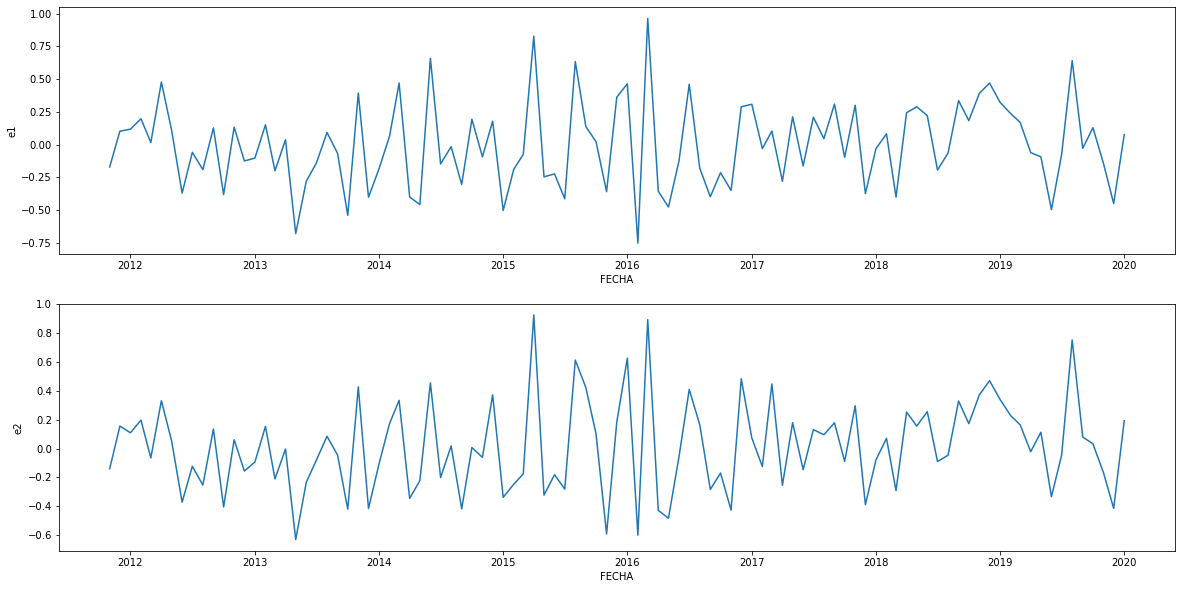

In [45]:
fig, ax =plt.subplots(2,1, figsize=(20, 10), sharex = False) #NUESTRA FIGURA TENDRÁ DOS SUBIMAGENES CON UNA ORTIENCACIÓN DE UNA 1X2

#FIG 1
sns.lineplot(y = df.e1, x = df.e1.index, dashes= True, err_style ="bars", ax = ax[0])

#FIG 2
sns.lineplot(y = df.e2, x = df.e2.index, dashes= True, err_style ="bars", ax = ax[1])

### Correlogramas

Text(0, 0.5, 'E2')

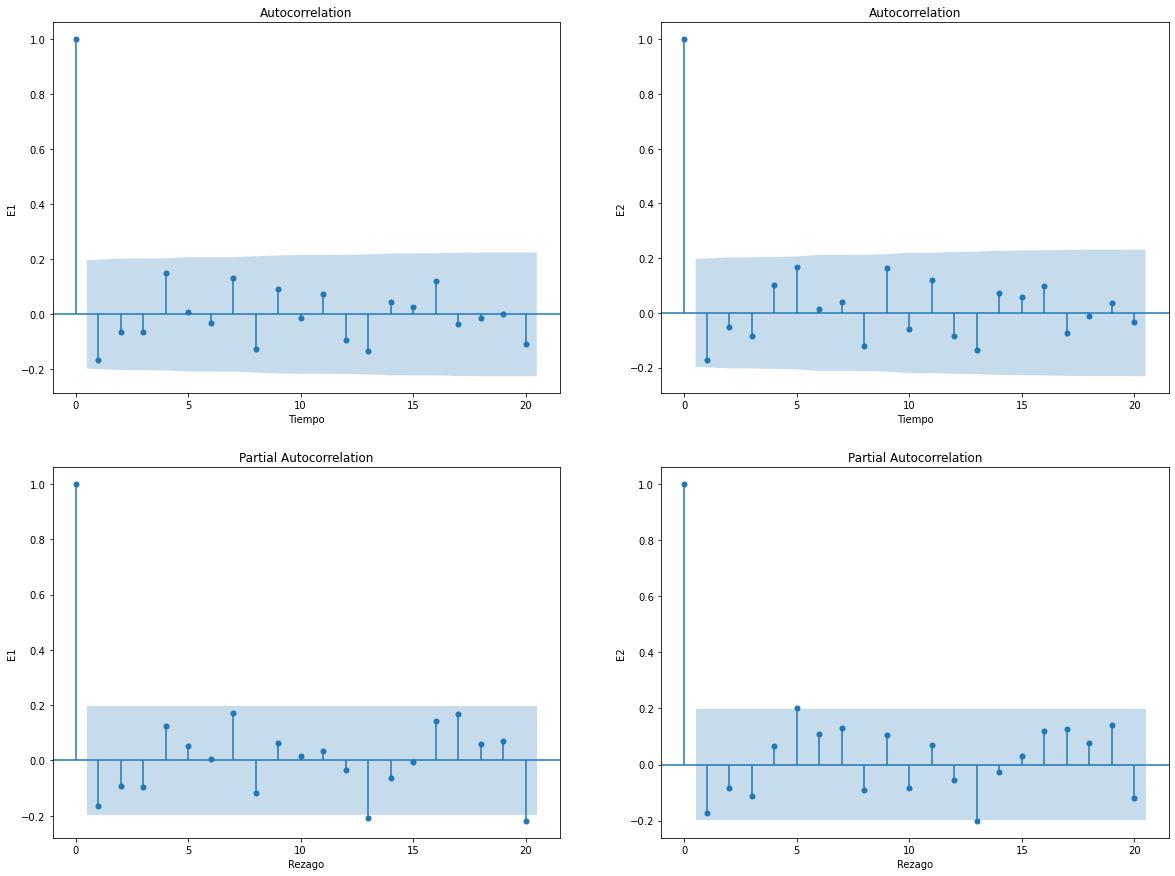

In [46]:
#Inspección gráfica

fig, ax =plt.subplots(2,2, figsize=(20, 15), sharex = False)

#FIG 0,0
plot_acf(df.e1.dropna(), ax = ax[0,0], alpha = 0.05)
ax[0,0].set_xlabel('Tiempo', fontsize=10)
ax[0,0].set_ylabel('E1', fontsize=10)


plot_acf(df.e2.dropna(), ax = ax[0,1], alpha = 0.05)
ax[0,1].set_xlabel('Tiempo', fontsize=10)
ax[0,1].set_ylabel('E2', fontsize=10)


#FIG 1
plot_pacf(df.e1.dropna(), ax = ax[1,0], lags  = 20, alpha = 0.05, method = "ols")
ax[1,0].set_xlabel('Rezago', fontsize=10)
ax[1,0].set_ylabel('E1', fontsize=10)

#FIG 2
plot_pacf(df.e2.dropna(), ax = ax[1,1], lags  = 20, alpha = 0.05, method = "ols")
ax[1,1].set_xlabel('Rezago', fontsize=10)
ax[1,1].set_ylabel('E2', fontsize=10)

### Qtest

In [47]:
from statsmodels.stats.diagnostic import acorr_ljungbox as QTest

In [48]:
A = pd.DataFrame() #creamos un dataframe vacío

for i in range(5,16,5): #en un rango del 1 al 15 de 5 en 5 (...)
    B  = QTest(df.e1.dropna(), lags=[i], return_df=True) #Estimamos la prueba para cada uno de los rezagos y (...)
    A = pd.concat([A,B]) # la concatenamos verticalmente con las demás pruebas

A

,lb_stat,lb_pvalue
5,5.983710,0.307807
10,10.587208,0.390569
15,14.590036,0.481330


In [49]:
A = pd.DataFrame() #creamos un dataframe vacío

for i in range(5,16,5): #en un rango del 1 al 15 de 5 en 5 (...)
    B  = QTest(df.e2.dropna(), lags=[i], return_df=True) #Estimamos la prueba para cada uno de los rezagos y (...)
    A = pd.concat([A,B]) # la concatenamos verticalmente con las demás pruebas

A

,lb_stat,lb_pvalue
5,8.173867,0.146910
10,13.276038,0.208645
15,18.856342,0.220318


## 4. REGRESIONES MINCER-ZARNOWITS

In [50]:
Y = df.iloc[130:].TD_SA
X1 = df.iloc[130:].F1
X2 = df.iloc[130:].F2

In [51]:
import statsmodels.api as sm #IMPORTAR EL PAQUETE

In [52]:
X1 = sm.add_constant(X1) #añadir constante al conjunto de x's de la primera espeificación
X2 = sm.add_constant(X2) #añadir constante al conjunto de x's de la primera espeificación

model1 = sm.OLS(Y, X1).fit() #ESTIMAR EL MODELO
print(model1.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                  TD_SA   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.79e-29
Time:                        09:26:01   Log-Likelihood:                -28.760
No. Observations:                  99   AIC:                             61.52
Df Residuals:                      97   BIC:                             66.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7748      0.545      1.422      0.1

In [53]:
model1 = sm.OLS(Y, X2).fit() #ESTIMAR EL MODELO
print(model1.summary()) #OUPUT DE LOS PRINCIPALES RESULTADOS

                            OLS Regression Results                            
Dep. Variable:                  TD_SA   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     282.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.64e-30
Time:                        09:26:01   Log-Likelihood:                -26.328
No. Observations:                  99   AIC:                             56.66
Df Residuals:                      97   BIC:                             61.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7340      0.529      1.386      0.1

## 5. MEDIDAS DE PRECISIÓN DE PRONOSTICOS

In [54]:
df

,TD_SA,DTD,F1,F2,e1,e2,e1_2,e2_2,e1_ab,e2_ab,TD_1,eRW_2
FECHA,,,,,,,,,,,,
2001-01-01,15.361843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,15.661992,0.300149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.361843,0.090089
2001-03-01,15.982787,0.320795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.661992,0.102909
2001-04-01,13.883685,-2.099101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.982787,4.406227
2001-05-01,15.055031,1.171346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.883685,1.372051
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,10.664752,-0.444984,10.693846,10.584245,-0.029094,0.080507,0.000846,0.006481,0.029094,0.080507,11.109736,0.198011
2019-10-01,10.688947,0.024195,10.559977,10.655424,0.128971,0.033523,0.016633,0.001124,0.128971,0.033523,10.664752,0.000585
2019-11-01,10.590073,-0.098874,10.734717,10.756803,-0.144645,-0.166730,0.020922,0.027799,0.144645,0.166730,10.688947,0.009776


In [55]:
#ERRORES AL CUADRADO
df["e1_2"] = df["e1"]**2
df["e2_2"] = df["e2"]**2

#ERRORES MEDIOS AL CUADRADO
MSE1 = np.nanmean(df["e1_2"])
MSE2 = np.nanmean(df["e2_2"])

#RMSE
RMSE1 = np.sqrt(MSE1)
RMSE2 = np.sqrt(MSE2)

#MAE
df["e1_ab"] = np.abs(df["e1"])
df["e2_ab"] = np.abs(df["e2"])

MAE1 = np.nanmean(df["e1_ab"])
MAE2 = np.nanmean(df["e2_ab"])

#R CUADRADO PREDICTIVO
mu = np.nanmean(df.TD_SA[130:])
ETD_2 = (df.TD_SA[130:] - mu )**2
denominador1 = np.sum(ETD_2)

R_2P1 = 1-(np.nansum(df.e1_2)/denominador1)
R_2P2 = 1-(np.nansum(df.e2_2)/denominador1)

#U DE THEIL
df["TD_1"] = df.TD_SA.shift(1)
df["eRW_2"] = (df["TD_SA"] - df["TD_1"])**2

U1 = 1-(np.nansum(df.e1_2)/np.nansum(df.eRW_2[130:]))
U2 = 1-(np.nansum(df.e2_2)/np.nansum(df.eRW_2[130:]))

#DATAFRAME
pd.DataFrame(zip([MSE1,RMSE1,MAE1,R_2P1,U1], [MSE2,RMSE2,MAE2,R_2P2,U2]), columns = ["ARIMA(4,1,2)", "ARIMA(5,1,2)"], index = ["MSE", "RMSE", "MAE", "R2P", "UTH"])


,"ARIMA(4,1,2)","ARIMA(5,1,2)"
MSE,0.106887,0.101736
RMSE,0.326935,0.318960
MAE,0.264058,0.256279
R2P,0.726139,0.739337
UTH,0.275889,0.310785


In [56]:
df

,TD_SA,DTD,F1,F2,e1,e2,e1_2,e2_2,e1_ab,e2_ab,TD_1,eRW_2
FECHA,,,,,,,,,,,,
2001-01-01,15.361843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,15.661992,0.300149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.361843,0.090089
2001-03-01,15.982787,0.320795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.661992,0.102909
2001-04-01,13.883685,-2.099101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.982787,4.406227
2001-05-01,15.055031,1.171346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.883685,1.372051
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-01,10.664752,-0.444984,10.693846,10.584245,-0.029094,0.080507,0.000846,0.006481,0.029094,0.080507,11.109736,0.198011
2019-10-01,10.688947,0.024195,10.559977,10.655424,0.128971,0.033523,0.016633,0.001124,0.128971,0.033523,10.664752,0.000585
2019-11-01,10.590073,-0.098874,10.734717,10.756803,-0.144645,-0.166730,0.020922,0.027799,0.144645,0.166730,10.688947,0.009776


## 6. EVALUACIÓN DE PRONOSTICO

In [57]:
df["L12"] = df.e1_2 - df.e2_2 #FUNCIÓN DE PERDIDA

Text(0, 0.5, 'PACF')

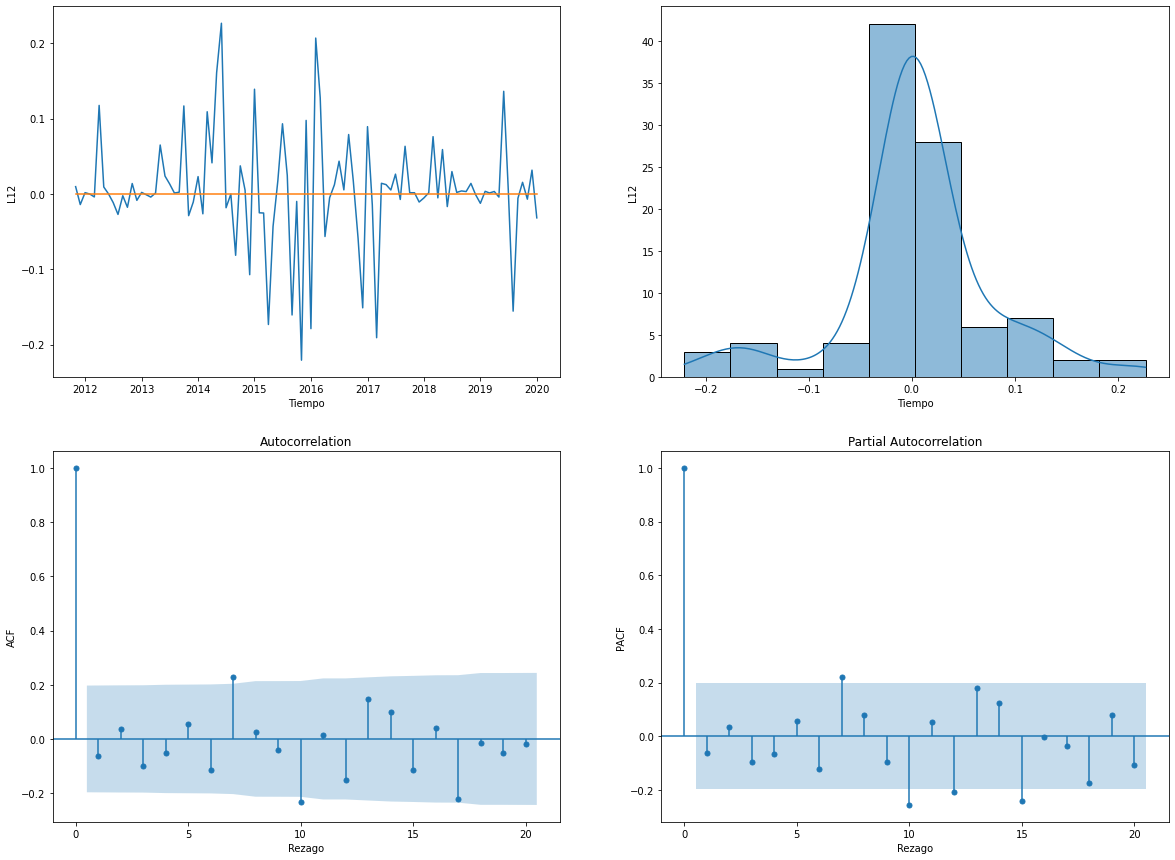

In [59]:
#Inspección gráfica

fig, ax =plt.subplots(2,2, figsize=(20, 15), sharex = False)

#FIG 0,0
sns.lineplot(y = df["L12"].dropna(), x = df["L12"].dropna().index, dashes= True, err_style ="bars", ax = ax[0, 0])
sns.lineplot(y = np.zeros(len(df["L12"].dropna())),  x = df["L12"].dropna().index, dashes= True, err_style ="bars", ax = ax[0, 0])
ax[0,0].set_xlabel('Tiempo', fontsize=10)
ax[0,0].set_ylabel('L12', fontsize=10)


sns.histplot(x = df["L12"].dropna() , ax=ax[0,1], bins = 10, kde = True)
ax[0,1].set_xlabel('Tiempo', fontsize=10)
ax[0,1].set_ylabel('L12', fontsize=10)


#FIG 1
plot_acf(df["L12"].dropna(), ax = ax[1,0], alpha = 0.05)
ax[1,0].set_xlabel('Rezago', fontsize=10)
ax[1,0].set_ylabel('ACF', fontsize=10)

#FIG 2
plot_pacf(df["L12"].dropna(), ax = ax[1,1], lags  = 20, alpha = 0.05, method = "ols")
ax[1,1].set_xlabel('Rezago', fontsize=10)
ax[1,1].set_ylabel('PACF', fontsize=10)

In [230]:
#AR1 PARA VER LA CONSTANTE

modelvf = ARIMA(df["L12"].dropna().dropna(), order=(1, 0, 0)).fit()
print(modelvf.summary())

                               SARIMAX Results                                
Dep. Variable:                    L12   No. Observations:                   99
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 118.946
Date:                Wed, 23 Mar 2022   AIC                           -231.891
Time:                        08:46:10   BIC                           -224.106
Sample:                    11-01-2011   HQIC                          -228.741
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.007      0.746      0.456      -0.008       0.019
ar.L1         -0.0636      0.078     -0.812      0.417      -0.217       0.090
sigma2         0.0053      0.001     10.215      0.0